### Observations and Insights
* The population of mice was evenly distributed between 50.4% male and 49.6% female in this study.  
* There is a high correlation of 0.84 between the Tumor Volume and Mouse Weight, indicating that larger mice have a larger tumor   volume when treated with Capomulin.
* Capomulin and Ramicane seem to be the best treatment for lowering tumor volume.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from scipy import stats 
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Study data files

mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

In [3]:
# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset

combined_df = mouse_metadata.merge(study_results, on = "Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.

n_mice = combined_df["Mouse ID"].value_counts()
n_mice

g989    13
t724    10
a411    10
z578    10
e662    10
        ..
b447     1
h428     1
v199     1
t573     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID","Timepoint"],keep = False) == True]
duplicate_df = duplicate_df["Mouse ID"].drop_duplicates()
duplicate_df = pd.DataFrame(duplicate_df)
duplicate_df

,Mouse ID
908,g989


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_ID = pd.DataFrame(duplicate_df)
duplicated_mouse = duplicated_ID.merge(combined_df, on = "Mouse ID")
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.copy()
clean_df = clean_df.loc[~(clean_df["Mouse ID"].isin(duplicate_df["Mouse ID"]))]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.

mice_count = len(clean_df["Mouse ID"].unique())
mice_count
print(f"Total of {mice_count} mice")

Total of 248 mice


# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.

summary = clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
tumor_mean = round(clean_df.groupby("Drug Regimen").mean().iloc[:,1],2)
tumor_median = round(clean_df.groupby("Drug Regimen").median().iloc[:,1],2)
tumor_std = round(clean_df.groupby("Drug Regimen").std().iloc[:,1],2)
tumor_var = round(clean_df.groupby("Drug Regimen").var().iloc[:,1],2)
tumor_sem = round(clean_df.groupby("Drug Regimen").sem().iloc[:,5],2)

tumor_summary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, 
                              "Variance": tumor_var, "Std": tumor_std, "SEM": tumor_sem})
tumor_summary       

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,19.97,20.5,7.47,2.73,0.33
Ceftamin,27.40,28.0,2.50,1.58,0.47
Infubinol,27.20,27.0,4.77,2.18,0.49
Ketapril,27.86,28.0,3.39,1.84,0.60
Naftisol,27.17,27.0,2.25,1.50,0.60
Placebo,27.93,28.0,3.38,1.84,0.58
Propriva,27.14,26.0,2.93,1.71,0.54
Ramicane,19.68,19.0,10.47,3.24,0.32
Stelasyn,27.86,28.0,2.70,1.64,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

round(clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}),2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

# Bar and Pie Charts

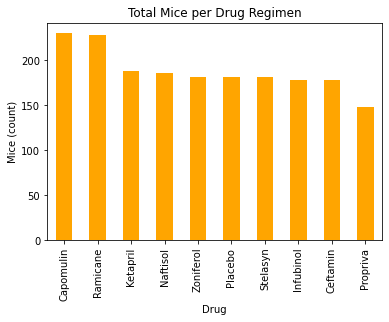

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


total_mice = clean_df["Drug Regimen"].value_counts()
total_mice.plot(kind="bar", figsize=(6,4), color = "orange")
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Mice (count)")
plt.xticks(rotation=90)
plt.show()

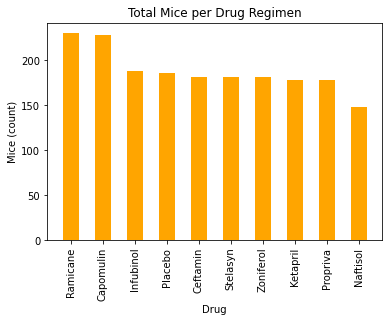

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_plt = clean_df["Drug Regimen"].unique()
drug_plt
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Mice (count)")
plt.bar(drug_plt, height = (total_mice), color = "orange", width = .5)
plt.xticks(rotation = "vertical")
plt.show()

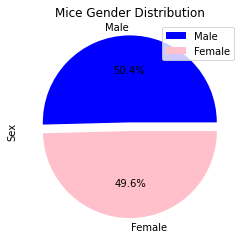

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = clean_df.drop_duplicates(subset=["Mouse ID"])
gender_df = gender_df["Sex"].value_counts()
labels = "Male", "Female"
plt.title("Mice Gender Distribution")
gender_df.plot.pie(colors=["blue", "pink"], explode=[0.1,0], autopct = '%1.1f%%')
plt.legend()
plt.show()

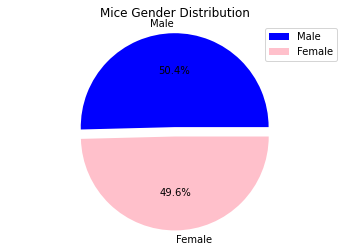

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = gender_df.values
labels = "Male", "Female"
fig1, ax1 = plt.subplots()
plt.title("Mice Gender Distribution")
ax1.pie(sizes, labels=labels, colors=["blue", "pink"], explode=[0.1,0], autopct='%1.1f%%')
ax1.axis('equal') 
plt.legend()
plt.show()

# Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [17]:
# Last (greatest) timepoint for each mouse

final_timepoint = round(clean_df.groupby("Mouse ID").max().reset_index(),2)
final_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.97,2
1,a251,Infubinol,Female,21,25,45,65.53,1
2,a262,Placebo,Female,17,29,45,70.72,4
3,a275,Ceftamin,Female,20,28,45,63.00,3
4,a366,Stelasyn,Female,16,29,30,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.71,0
244,z578,Ramicane,Male,11,16,45,45.00,0
245,z581,Infubinol,Female,24,25,45,62.75,3
246,z795,Naftisol,Female,13,29,45,65.74,3


In [18]:
drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

merge_data = round(final_timepoint[["Mouse ID", "Timepoint"]].merge(clean_df, on=["Mouse ID", "Timepoint"], how='left'),2)
merge_data
four_drugs = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_drugs

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
3,a275,45,Ceftamin,Female,20,28,63.00,3
6,a411,45,Ramicane,Male,3,22,38.41,1
7,a444,45,Ramicane,Female,10,25,43.05,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.59,4
239,y793,45,Capomulin,Male,17,17,31.90,2
240,y865,45,Ceftamin,Male,23,26,64.73,3
244,z578,45,Ramicane,Male,11,16,30.64,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
treatments = four_drugs["Drug Regimen"].unique().tolist()

tumor_volume = []

for i, treatment in enumerate(treatments):
    outliers_df = four_drugs.loc[(four_drugs["Drug Regimen"] == treatment)]
    tumor_volume.append(outliers_df[["Drug Regimen","Tumor Volume (mm3)"]])
    
    Q1 = outliers_df["Tumor Volume (mm3)"].quantile(0.25)
    Q3 = outliers_df["Tumor Volume (mm3)"].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower = round(Q1 - (1.5 * IQR),2)
    upper = round(Q3 + (1.5 * IQR),2)
    
    print(f"Values below {lower} and above {upper} for {treatment} could be outliers")

Values below 36.83 and above 82.75 for Infubinol could be outliers
Values below 25.35 and above 87.67 for Ceftamin could be outliers
Values below 17.91 and above 54.31 for Ramicane could be outliers
Values below 20.71 and above 51.83 for Capomulin could be outliers


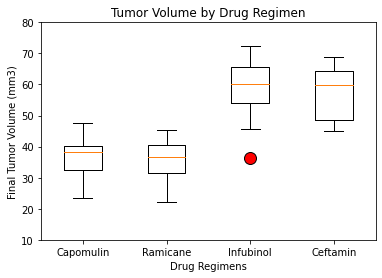

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drugs_summary = four_drugs.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]
drugs_summary

drugs_df = drugs_summary.to_frame()
drugs_df

final_four = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

final_df = drugs_df.reset_index()

tumors = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(final_four)
tumor_df = [vol for vol in tumor_df["Tumor Volume (mm3)"]]
fliers = dict(marker='o', markerfacecolor='r', markersize=12)
plt.boxplot(tumor_df, labels=final_four, flierprops=fliers)
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimens")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

# Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = round(clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"],2)
mouse = capomulin.sample(1)
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
117,y793,Capomulin,Male,17,17,10,41.63,1


In [23]:
mouse_df = round(capomulin.loc[capomulin["Mouse ID"] == mouse.iloc[0,0], :],2)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.00,0
116,y793,Capomulin,Male,17,17,5,41.02,0
117,y793,Capomulin,Male,17,17,10,41.63,1
118,y793,Capomulin,Male,17,17,15,42.28,1
119,y793,Capomulin,Male,17,17,20,40.72,2
120,y793,Capomulin,Male,17,17,25,38.99,2
121,y793,Capomulin,Male,17,17,30,35.73,2
122,y793,Capomulin,Male,17,17,35,36.33,2
123,y793,Capomulin,Male,17,17,40,31.48,2
124,y793,Capomulin,Male,17,17,45,31.90,2


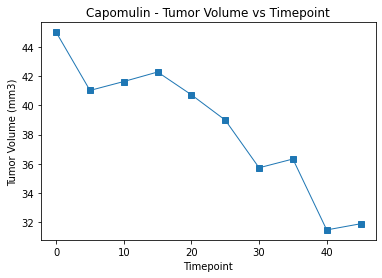

In [24]:
x_values = mouse_df["Timepoint"]
y_values = mouse_df["Tumor Volume (mm3)"]
plt.plot(x_values, y_values, marker='s', linewidth=1)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin - Tumor Volume vs Timepoint")
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = round(capomulin.groupby("Mouse ID").mean(),2)
avg_tumor

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.96,0.70
b742,7.0,21.0,22.5,40.08,0.00
f966,16.0,17.0,10.0,36.51,0.00
g288,3.0,19.0,22.5,41.99,0.80
g316,22.0,22.0,22.5,44.61,1.00
i557,1.0,24.0,22.5,44.81,0.20
i738,23.0,20.0,22.5,39.14,0.60
j119,7.0,23.0,22.5,44.47,0.60
j246,21.0,21.0,17.5,43.22,0.25


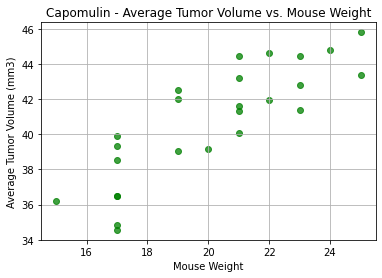

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]

# create scatter plot
plt.scatter(x_values, y_values, marker="o", color="green", alpha=0.75)

plt.grid()
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")
plt.show()

# Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [28]:
# Correlation coefficient
x_values = avg_tumor["Weight (g)"]
y_values = avg_tumor["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}")

The correlation coefficient is 0.84


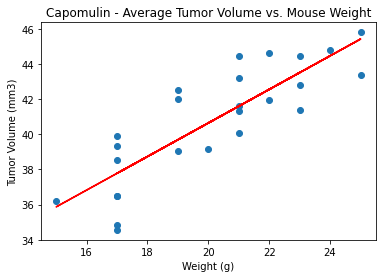

y = 0.95 x + 21.56


In [29]:
# Linear Regression Model
x_val = avg_tumor["Weight (g)"]
y_val = avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.show()
print(line_eq)
